Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте
Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).
Выбрать стратегию для работы с пропущенными значениями.
Рассчитать и визуализировать корреляционную матрицу для переменных.
Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).
С помощью статистических методов проверить взаимосвязи между переменными.
Сгенерировать новые переменные (фичи)
Попробовать отобрать наиболее важные переменные (сделать Feature Selection)
Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.
Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
%matplotlib inline
from scipy.stats import pearsonr

In [55]:
url=r"C:\Users\af.sabirova\Desktop\pyda\Diploma_work_total\data_breast.csv"
data=pd.read_csv(url)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#1) ID number
#2) Diagnosis (Диагноз: М = злокачественный, В = доброкачественный)
#3-32)
#Десять реальных функций вычисляются для каждого ядра клетки::

#a) radius (среднее расстояние от центра до точек по периметру)
#b) texture (стандартное отклонение значений серой шкалы)
#c) perimeter (периметр)
#d) area (площадь)
#e) smoothness (локальное изменение длины радиуса)
#f) compactness (периметр ^ 2 / площадь - 1,0)
#g) concavity (тяжесть вогнутых участков контура)
#h) concave points (количество вогнутых чстей контура)
#i) symmetry (симметрия)
#j) fractal dimension («приближение береговой линии» - 1)

Посмотрим отсутствующие данные:

,Total,Percent
Unnamed: 32,569,100.0


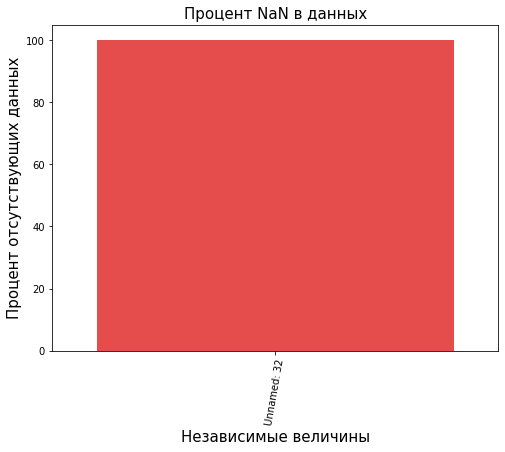

In [18]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='80')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Независимые величины', fontsize=15)
    plt.ylabel('Процент отсутствующих данных', fontsize=15)
    plt.title('Процент NaN в данных', fontsize=15)
    return ms

missingdata(data)

Удалим столбец Unnamed, так как он не несет никакую информаци. 

In [56]:
drop_column = ['Unnamed: 32']
data.drop(drop_column, axis=1, inplace = True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [24]:
data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


В таблице отражены следуюшие показатели из задания: среднее, мин/макс, сред. отклонение.
Рассчитаем медиану и моду по некоторым переменным

In [11]:
print('Медиана по radius_mean: ', statistics.median(data['radius_mean']))
print('Медиана по texture_mean: ',statistics.median(data['texture_mean']))
print('Медиана по perimeter_mean: ',statistics.median(data['perimeter_mean']))
print('Медиана по area_mean: ',statistics.median(data['area_mean']))

Медиана по radius_mean:  13.37
Медиана по texture_mean:  18.84
Медиана по perimeter_mean:  86.24
Медиана по area_mean:  551.1


In [17]:
print('Мода по radius_mean: ', statistics.mode(data['radius_mean']))
print('Мода по smoothness_mean: ',statistics.mode(data['smoothness_mean']))
print('Мода по area_mean: ',statistics.mode(data['area_mean']))

Мода по radius_mean:  12.34
Мода по smoothness_mean:  0.1007
Мода по area_mean:  512.2


2. Выбрать стратегию для работы с пропущенными значениями.

In [26]:
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


В таблице нет отсутствующих значений. 

3. Рассчитать и визуализировать корреляционную матрицу для переменных. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …). С помощью статистических методов проверить взаимосвязи между переменными.

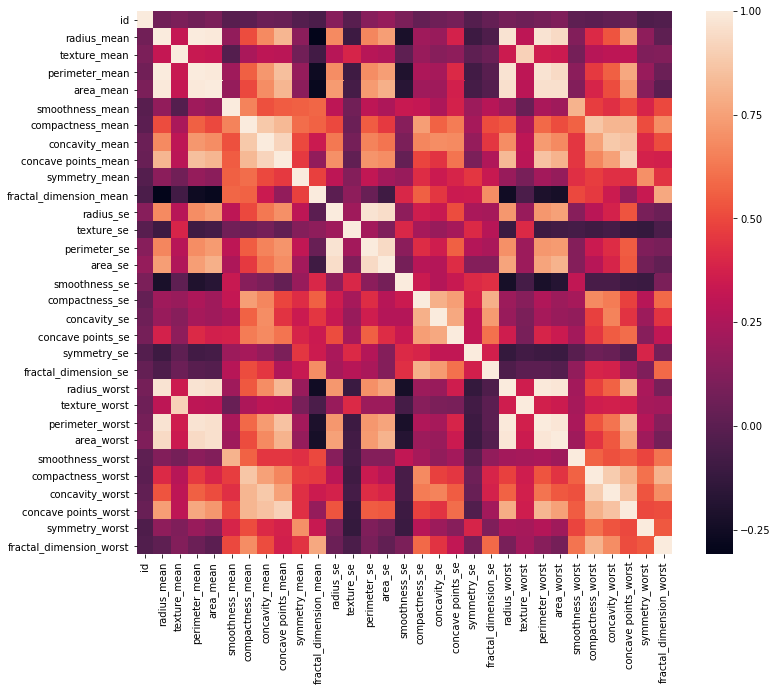

In [29]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=False)

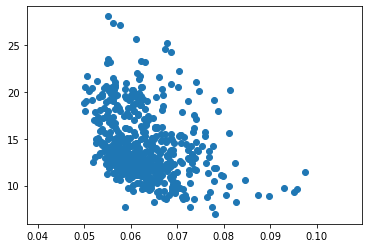

In [30]:
plt.scatter(data['fractal_dimension_mean'], data['radius_mean'])
plt.show()

На графике можно увидеть обратную корреляцию между переменными. 

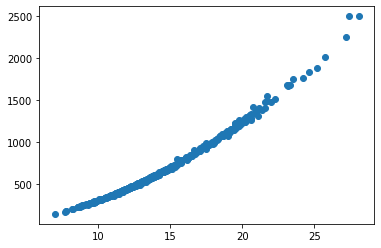

In [40]:
plt.scatter(data['radius_mean'], data['area_mean'])
plt.show()

По этому графику заметна прямая корреляция, что логично, радиус и площадь взаимзоависимы. 

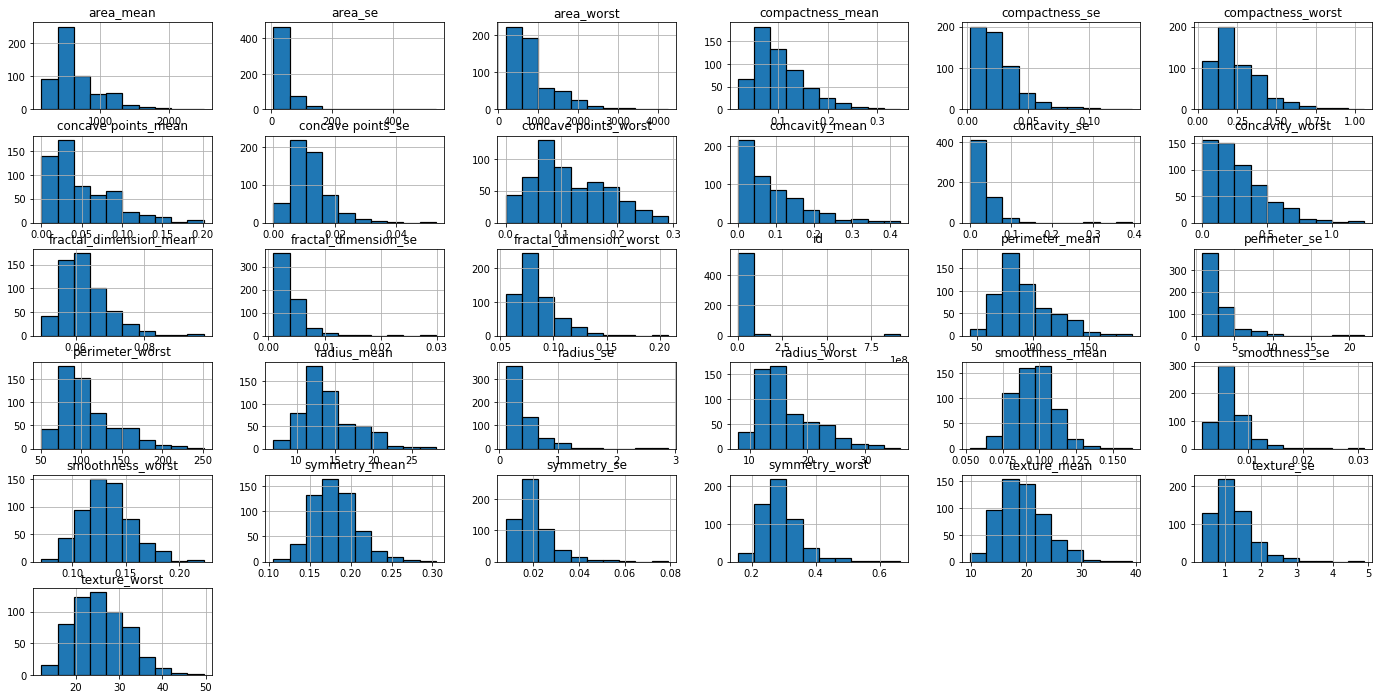

In [38]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(24,12)
plt.show()

Среди переменных есть нормальные распределения (smoothness_worst, texture_worst ), но в основном логнормальные (area_worst, fractal_dimension_mean и др.)

С использованием t-test статистики проверим взаимосвязи между несколькими переменными.

In [46]:
M=data.loc[(data['diagnosis']=='M')]['radius_mean']
B=data.loc[(data['diagnosis']=='B')]['radius_mean']
tt=stats.ttest_ind(M, B)
tt

Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)

Средний радиус доброкачественных клеток отличается от злокачетсвенных, поэтому нулевую гипотезу принять не можем (меньше 5%)

4. Сгенерировать новые переменные (фичи) Попробовать отобрать наиболее важные переменные (сделать Feature Selection) 

Можно объединить такие переменные, которые имеют корелляцию больше чем 80% 

In [57]:
corr_matrix = data.corr().abs()

# выбирается верхний треугольник матрицы корелляций (она же симметрична)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# найдем индексы колонок с корелляцией больше чем 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)

['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


In [59]:
data = data.drop(data[to_drop], axis=1)
data.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


Удаляем Id (так как не несет смысловой нагрузки)

In [60]:
drop_column = ['id']
data.drop(drop_column, axis=1, inplace = True)

In [61]:
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


P.S. Генерировать новые переменные не стала, так как не совсем разбираюсь в этих медицинских переменных, очевидные новые фичи в голову не пришли

5. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall 

In [84]:
from sklearn.linear_model import LogisticRegression

y = data.diagnosis
X = data.drop('diagnosis', axis=1)

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [91]:
from sklearn.metrics import classification_report
# разделим датасет на зависимые переменные и таргет значение (X и Y)
y = data.diagnosis
X = data.drop('diagnosis', axis=1)

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           B       0.88      0.99      0.93        86
           M       0.98      0.79      0.87        57

    accuracy                           0.91       143
   macro avg       0.93      0.89      0.90       143
weighted avg       0.92      0.91      0.91       143



Попробуем улучшить точность предсказаний

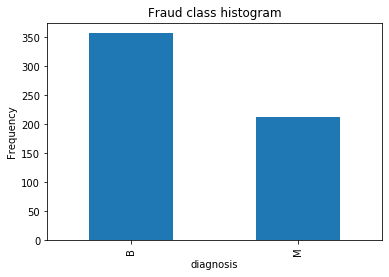

In [92]:
count_classes = pd.value_counts(data['diagnosis'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("diagnosis")
plt.ylabel("Frequency")
plt.show()

Данные несбалансированы, попробуем сбалансировать

In [93]:
from sklearn.utils import resample

# создадим вектор X как общие данные (X и Y)
X = pd.concat([X_train, y_train], axis=1)

# разделим на 2 класса - ill и non-ill
not_ill = X[X.diagnosis=='B']
ill = X[X.diagnosis=='M']

# генерируем данные для класса с меньшим количеством элементов
ill_upsampled = resample(ill,
                          replace=True, # элемент с заменой
                          n_samples=len(not_ill), # кол-во эл-тов =кол-во эл-ов в бОльшей выборке
                          random_state=27) # выбираем переменную для random

# объединим полученные класс с бОльшей выборкой
upsampled = pd.concat([not_ill, ill_upsampled])

# проверим количество классов теперь
upsampled.diagnosis.value_counts()

M    271
B    271
Name: diagnosis, dtype: int64

In [94]:
y_train = upsampled.diagnosis
X_train = upsampled.drop('diagnosis', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

print(classification_report(y_test, upsampled_pred))

              precision    recall  f1-score   support

           B       0.92      0.95      0.94        86
           M       0.93      0.88      0.90        57

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



В результате предсказание и полнота по злокачественным улучшилось, по доброкачественным снизилось. Попробуем второй вариант, сбалансировать по наименьшему показателю.

In [115]:
# уменьшаем выборку с бОльшим количеством элементов
not_ill_downsampled = resample(not_ill,
                                replace = False, # без замены
                                n_samples = len(ill), # количество = кол-во эл-тов в меньшей выборке
                                random_state = 27) # 

# объединим полученные данные с меньшей выборкой
downsampled = pd.concat([not_ill_downsampled, ill])

# проверим количество
downsampled.diagnosis.value_counts()

M    155
B    155
Name: diagnosis, dtype: int64

In [116]:
y_train = downsampled.diagnosis
X_train = downsampled.drop('diagnosis', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

print(classification_report(y_test, undersampled_pred))

              precision    recall  f1-score   support

           B       0.94      0.94      0.94        89
           M       0.91      0.91      0.91        54

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [117]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(X_train, y_train)

y_pred_my_forest = my_forest.predict(X_test)

print(classification_report(y_test, y_pred_my_forest))

              precision    recall  f1-score   support

           B       1.00      0.99      0.99        89
           M       0.98      1.00      0.99        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



В результате применения дерева решений удалось увеличить точность предсказания и теперь модель может быть применена и считается обученной